# Исследование закономерностей, определяющих успешность компьютерной игры

## Содержание исследования <a id='contents'> </a>

* [1. Цель исследования и план работы](#purpose)  
* [2. Обзор данных](#data_overview)  
    * [2.1. Выводы](#data_overview_conclusion)  
* [3. Предобработка данных](#data_preprocessing)  
    * [3.1. Изменение названий столбцов](#column_names)  
    * [3.2. Изменение типов данных](#types)  
    * [3.3. Обработка пропусков](#gaps)  
    * [3.4. Обработка дубликатов](#duplicates)  
    * [3.5. Обработка аномальных значений](#anomalies)  
    * [3.6. Добавление новых столбцов](#add_new_columns)  
    * [3.7. Выводы](#data_preprocessing_conclusions)  
* [4. Исследовательский анализ данных](#research)  
    * [4.1. Динамика выпуска игр по годам](#games_release_by_years)  
    * [4.2. Статистика продаж по платформам](#games_sales_by_platf)  
    * [4.3. Выбор потенциально прибыльных платформ в 2017 году](#profitable_platf)   
    * [4.4. Диаграммы размаха глобальных продаж игр в разбивке по платформам](#global_sales_by_platf)  
    * [4.5. Влияние отзывов пользователей и критиков на продажи внутри платформы](#scores)  
    * [4.6. Общее распределение игр по жанрам](#genres)  
* [5. Портрет пользователя каждого региона](#portrait_of_user)  
    * [5.1. Топ-5 популярных платформ в регионах](#top_5_by_platf)  
    * [5.2. Топ-5 популярных жанров в регионах](#top_5_by_genres)  
    * [5.2. Влияние рейтинга ESRB на продажи в отдельных регионах](#rating_influence)  
    * [5.4. Вывод](#portrait_conclusion)  
* [6. Проверка гипотез](#hypothesis_checking)  
    * [6.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#user_scores_avg)  
    * [6.2. Средние пользовательские рейтинги жанров Action и Sports разные](#user_scores_avg_2)  
* [7. Итоги исследования](#research_results)

## 1. Цель исследования и план работы <a id='purpose'> </a>

В нашем распоряжении исторические данные о продажах, оценках пользователей и экспертов, жанрах и платформах компьютерных игр.

**Задача**  

Выявить определяющие успешность игры закономерности и определить потенциально популярный продукт для дальнейшего планирования рекламных кампаний.

**Описание данных**

- `Name` — название игры  
- `Platform` — платформа  
- `Year_of_Release` — год выпуска  
- `Genre` — жанр игры  
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
- `EU_sales` — продажи в Европе (миллионы проданных копий)  
- `JP_sales` — продажи в Японии (миллионы проданных копий)  
- `Other_sales` — продажи в других странах (миллионы проданных копий)  
- `Critic_Score` — оценка критиков (максимум 100)  
- `User_Score` — оценка пользователей (максимум 10)  
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

*Данные за 2016 год могут быть неполными.  

**План работы**

Данная работа состоит из следующих этапов:
1) Описание целей исследования и плана работ  

2) Обзор данных:  
- откроем файл с данными и изучим общую информацию.  

3) Предобработка данных:   
- заменим названия столбцов (приведём к нижнему регистру);  
- преобразуем данные в нужные типы и опишем, в каких столбцах заменили тип данных и почему;  
- обработаем пропуски при необходимости;  
 * объясним, почему заполнили пропуски определённым образом или почему не стали это делать;  
 - опишем причины, которые могли привести к пропускам;  
 * отдельно разберём значение 'tbd' в столбце с оценкой пользователей и опишем, как его обработать;  
- посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.  

4) Исследовательский анализ данных:  
- посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды;  
- посмотрим, как менялись продажи по платформам, выберем платформы с наибольшими суммарными продажами и построим распределение по годам; выясним за какой характерный срок появляются новые и исчезают старые платформы;  
- возьмём данные за соответствующий актуальный период, которые помогут построить прогноз на 2017 год;  
- выясним какие платформы лидируют по продажам, растут или падают и выберем несколько потенциально прибыльных платформ;  
- построим диаграмму размаха по глобальным продажам игр в разбивке по платформам и опишем результат;  
- посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков; построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами; сформулируем выводы;  
- соотнесём выводы с продажами игр на других платформах;  
- посмотрим на общее распределение игр по жанрам и выясним, что можно сказать о самых прибыльных жанрах и выделяются ли жанры с высокими и низкими продажами;  

5) Составление портрета пользователя каждого региона:  
- определим для пользователя каждого региона (NA, EU, JP):  
 * самые популярные платформы (топ-5) (опишем различия в долях продаж);  
 * самые популярные жанры (топ-5) (поясним разницу);  
 * влияет ли рейтинг ESRB на продажи в отдельном регионе.

6) Проверка гипотез:  
* средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
* средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;  

7) Итоги исследования и общий вывод.  
[К содержанию](#contents)

## 2. Обзор данных <a id='data_overview'> </a>

Подключим необходимые библиотеки для проведения анализа.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import missingno
import warnings
warnings.filterwarnings('ignore')

Откройем файл с данными и выведем на экран первые 20 строк предоставленных данных.

In [2]:
df = pd.read_csv('games.csv')
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем на экран общую информацию о датафрейме.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 2.1. Выводы <a id='data_overview_conclusion'> </a>

Из общих данных можно сделать следующие выводы:  
1) в таблице 11 столбцов и 16715 строк;  
2) в столбцах `Critic_Score`, `User_Score` и `Rating` присутствует большое количество пропусков;  
3) тип данных в столбце `Year_of_Release` следует изменить с *float64* на *int32*, так как год - всегда целое число;  
4) тип данных в столбце `User_Score` следует изменить со строкового на числовой *float64* для дальнейших вычислений;  

[К содержанию](#contents)

## 3. Предобработка данных <a id='data_preprocessing'> </a>

### 3.1. Изменение названий столбцов <a id='column_names'> </a>

Приведем названия всех столбцов к нижнему регистру.

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

[К содержанию](#contents)

### 3.2. Изменение типов данных <a id='types'> </a>

#### Столбец `year_of_release`

Изменим тип данных в столбце `year_of_release` с вещественного типа *float64* на целочисленный *int32*, так как год - всегда целое число.

In [5]:
df['year_of_release'] = df['year_of_release'].astype('Int32')
df['year_of_release'].dtype

Int32Dtype()

#### Столбец `user_score`

Данные в столбце `user_score` могут иметь тип *object* вследствие того, что в данных присутствуют нечисловые значения. Рассмотрим список уникальных значений столбца `user_score`.

In [6]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Среди уникальных значений столбца `user_score` есть строковое значение `tbd`, которое не позволит нам преобразовать строковые значения в числовой тип, если мы не заменим некорректное значение на NaN. Посмотрим, сколько таких значений в столбце.

In [7]:
df[df['user_score'] == 'tbd']['user_score'].count()

2424

Аббревиатура 'tbd' расшифровывается как 'То Be Defined (Determined)' и используется, если какая-то информация еще не определена или решение по вопросу не принято. То есть данные были заполнены аббревиатурой 'tbd' умышленно, чтобы показать, что по играм оценка пользователей ещё не определена. Следовательно, мы можем заменить значения `tbd` на NaN, а значения столбца преобразовать в тип данных *float64* для дальнейших вычислений.

In [8]:
# преобразуем значения столбца в числовой тип, а некорректные значения принудительно заменяем на NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [9]:
df['user_score'].dtype

dtype('float64')

[К содержанию](#contents)

### 3.3. Обработка пропусков <a id='gaps'> </a>

Визуализируем количество порпусков по столбцам.

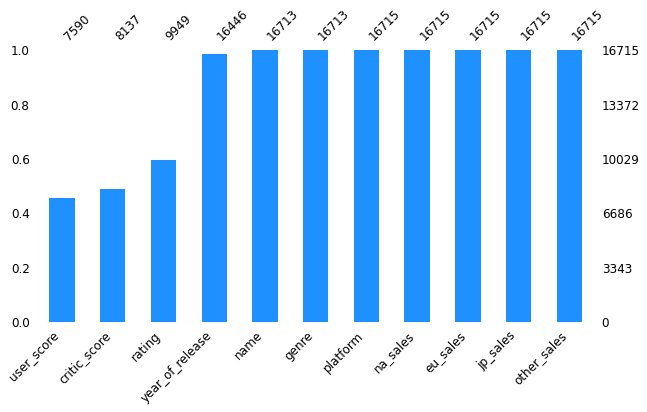

In [10]:
missingno.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

Пропуски данных обнаружены в 6 столбцах таблицы.

#### Столбцы `user_score` и `critic_score`

Посмотрим, сколько строк имеют пропуски данных в столбцах `user_score`, `critic_score` и `rating` одновременно.

In [11]:
len(df.loc[(df['user_score'].isna()) & (df['critic_score'].isna()) & (df['rating'].isna())])

6667

В 6667 строках одновременно отсутствтуют данные в столбцах `user_score`, `critic_score` и `rating`. Скорее всего, данные по этим трём столбцам брались из одного источника и либо отсутствовали в источнике, либо имела место техническая проблема с передачей данных, поэтому они одновременно отсутствуют в большом объеме строк. Также, мы помним что в 2424 строках значение `tbd` в столбце `user_score` мы сами заменили на пропуски. Эти причины могли привести к отсутствию данных в указанных столбцах.  

Отсутствующие данные оценки пользователей и оценки критиков невозможно заполнить нулём, так как это исказит данные. Исследуем взаимосвязь этих значений с другими параметрами.

In [12]:
df.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411,-0.267851
na_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755,0.086200
eu_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752,0.055337
jp_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593,0.125598
other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554,0.057119
critic_score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000,0.580878
user_score,-0.267851,0.086200,0.055337,0.125598,0.057119,0.580878,1.000000


Из матрицы корреляции видно, что самая тесная линейная взаимосвязь существует между самими столбцами `critic_score` и `user_score`. Построим гистограммы и диаграммы рассеяния для этих двух величин.

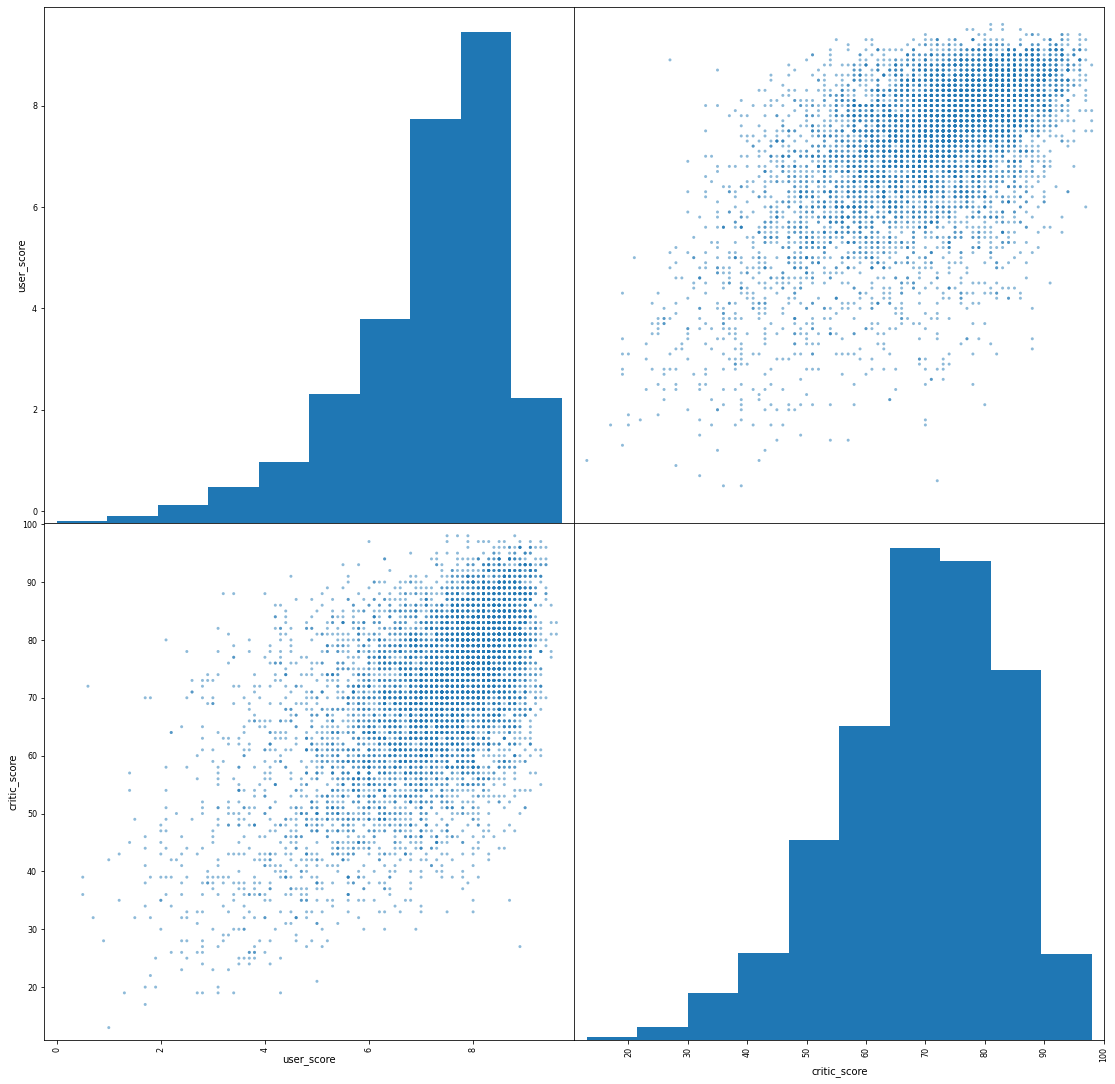

In [13]:
pd.plotting.scatter_matrix(df[['user_score', 'critic_score']], figsize=(19, 19));

Существует линейная взаимосвязь: чем выше оценка критиков, тем выше оценка пользователей и наоборот, но она не достаточно сильная. Проанализируем распределение значений разниц между оценкой критиков, деленной на 10, и оценкой пользователей.

In [14]:
# создадим столбец со значениями оценки критиков 'critic_score', деленными на 10
critic_score_div_10 = df['critic_score'] / 10
# создадим столбец со значениями разниц между оценкой критиков, деленной на 10, и оценкой пользователей
critic_and_user_score_diff = critic_score_div_10 - df['user_score']
# посмотрим список характерных значений для разниц между оценкой критиков, деленной на 10, и оценкой пользователей
critic_and_user_score_diff.describe().round(1)

count    7017.0
mean       -0.2
std         1.3
min        -6.2
25%        -0.9
50%        -0.2
75%         0.5
max         6.6
dtype: float64

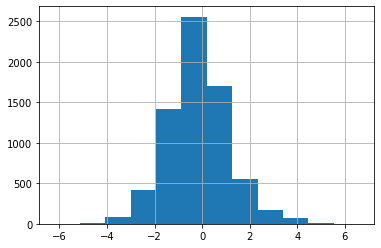

In [15]:
critic_and_user_score_diff.hist(bins=12);

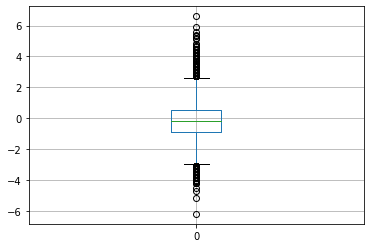

In [16]:
critic_and_user_score_diff.to_frame().boxplot();

Видим, что в среднем оценка критиков на 0.2 балла меньше, чем оценка пользователей, но существует и существенная разница до 6 баллов как в большую, так и в меньшую сторону. Среднее немного отличается от медианы в большую сторону, так как в положительную сторону присутствует больше выбросов и максимальный выброс 6.6. Значения имеют нормальное распределение.

**Варианты заполнения пропусков в столбцах `user_score` и `critic_score`:**  
*Вариант 1*  
Можно заполнить пропуски в столбце `critic_score` при наличии значения в столбце `user_score`, используя среднюю разницу, значением (`user_score` - 0.2) * 10, а пропуски в столбце `user_score` при наличии значения в столбце `critic_score` значением (`critic_score` / 10) + 0.2.  
*Вариант 2*  
Альтернативный вариант - можно посчитать среднее значение `user_score` для конкретного значения `critic_score` и наоборот, и заполнить пропуски средними значениями.  

**НО:** оценки - это индивидуальный и субъективный параметр, и заполнив их расчётными значениями, мы получим искажение результата, поэтому здесь лучше пропуски оставить как есть.

**Реультат:** пропуски в столбцах `user_score` и `critic_score` оставим без изменений.

#### Столбец `rating`

In [17]:
df['rating'].isna().sum()

6766

Как мы уже отмечали ранее, в 6667 строках одновременно отсутсвтуют данные в столбцах `user_score`, `critic_score` и `rating`. Скорее всего, данные по этим трём столбцам брались из одного источника и либо отсутствовали в источнике, либо имела место техническая проблема с передачей данных. Оставим пропуски как есть.

**Результат:** оставим пропуски в столбце `rating` без изменений.

#### Столбец `year_of_release`

In [18]:
df['year_of_release'].isna().sum()

269

В столбце `year_of_release` 269 пропусков. Отсутствие данных о годе выхода игры может быть вызвано случайным пропуском оператором при вводе данных или вследствие отсутствия точной информации о годе выхода игры. Заполним пропуски годом выпуска этой же игры на других платформах. Если на других платформах года выпуска отличаются, возьмём медианное значение и округлим. 

In [19]:
name_year = df.pivot_table(index=['name'], values='year_of_release', aggfunc='median')

def fill_year_of_release(row):
    global name_year
    if pd.isna(row['year_of_release']):
        if row['name'] in name_year.index:
            return int(name_year.loc[name_year.index==row['name'], 'year_of_release'])
    return row['year_of_release']

df['year_of_release'] = df.apply(fill_year_of_release, axis=1)
df['year_of_release'].isna().sum()

146

**Результат:** нам удалось заполнить 123 пропуска в столбце `year_of_release`.

#### Столбцы `genre` и `name`

In [20]:
df[['genre', 'name']].isna().sum()

genre    2
name     2
dtype: int64

В столбцах `genre` и `name` по два пропуска. Посмотрим на эти строки.

In [21]:
df.loc[(df['genre'].isna()) | (df['name'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Это всего две игры, в которых отсутствуют данные о названии и жанре одновременно. Обе игры выпущены в 1993, очень давно. Возможно, с эти связано отсутствие данных. Просто удалим эти строки из датафрейма, так как они бесполезны для анализа.

In [22]:
df = df.drop(df.loc[df['name'].isna()].index)
df.shape

(16713, 11)

**Результат:** удалены две строки из датафрейма с отсутствующими значениями в столбцах `genre` и `name`.

#### Выводы

1) В результате обработки пропусков нам удалось заполнить 123 пропуска в столбце `year_of_release`;  

2) Две строки с отсутствующими значениями в столбцах `genre` и `name` были удалены из датафрейма.  

3) Одновременное отсутствие данных в столбцах `user_score`, `critic_score` и `rating` может быть связано с отсутствием этих данных в источнике или с технической проблемой передачи данных. Также, 2424 строках значение `tbd` в столбце `user_score` мы сами заменили на пропуски. Отсутствие данных в столбце `year_of_release` о годе выхода игры может быть вызвано случайным пропуском оператором при вводе данных или вследствие отсутствия точной информации о годе выхода игры. Данные об имени и жанре игр отсуствовали в двух строках. Обе игры были выпущены в 1993, очень давно. Возможно, с эти связано отсутствие данных.

[К содержанию](#contents)

### 3.4. Обработка дубликатов <a id='duplicates'> </a>

Проверим датафрейм на дубликаты строк.

In [23]:
print(f'В таблице {df.duplicated().sum()} дубликатов строк.')

В таблице 0 дубликатов строк.


Проверим столбец `genre` на наличие неявных дубликатов.

In [24]:
df['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

В столбце `genre` неявных дубликатов нет.

Проверим столбец `platform` на наличие неявных дубликатов.

In [25]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

В столбце `platform` неявных дубликатов нет.

Столбец `name` необходимо проверить на явные дубликаты названий игр, но с учётом того, что игра может иметь одинаковое название на разных платформах. То есть проверять на дубликаты нужно названия игр внутри одной платформы. Проверять на наличие неявных дубликатов смысла не имеет, так как игра может иметь одинаковое или похожее название для разных лет выпуска и платформ. Мы не сможем определить, что является неявным дубликатом, а что модификацией названия.

Проверим столбец `name` на явные дубликаты названий игр. Для этого сначала создадим словарь `platform_name`, в котором ключами будут названия платформ, а значениями - списки игр. Затем найдем дубликаты названий игр внутри одной платформы.

In [26]:
# создадим словарь platform_name, в котором ключами будут названия платформ, а значениями - списки игр.
platform_name = {}
for platform in df['platform'].unique():
    if platform in platform_name.keys():
        platform_name[platform].append(df.loc[df['platform']==platform, 'name'].to_list())
    else:
        platform_name[platform] = df.loc[df['platform']==platform, 'name'].to_list()

# найдем дубликаты названий игр внутри одной платформы следующим образом: в словаре platform_name сравним длину списка 
# названий игр и длину списка уникальных значений этого же списка;
# если длина списка названий игр и длина списка уникальных значений этого же списка не равны, будем записывать в словарь
# duplicated_games_dict названине платформы как ключ и название игры, имеющее дубликат, как значение словаря
duplicated_games_dict = {}
for platform in platform_name:
    games_by_platform_data = pd.DataFrame(platform_name[platform])
    count_names = len(platform_name[platform])
    unique_names = len(games_by_platform_data[0].unique())
    diff = count_names - unique_names
    if (diff != 0):
        dupl_games_lst = games_by_platform_data.loc[games_by_platform_data.duplicated(), 0].to_list()
        if platform in duplicated_games_dict:
            duplicated_games_dict[platform].append(dupl_games_lst)
        else:
            duplicated_games_dict[platform] = dupl_games_lst     
duplicated_games_dict

{'X360': ['Need for Speed: Most Wanted'],
 'PS3': ['Sonic the Hedgehog', 'Madden NFL 13'],
 'PC': ['Need for Speed: Most Wanted']}

Получили словарь с дубликатами названий игр по платформам. Выведем на экран соотвтетствующие строки датафрейма для анализа.

In [27]:
for platform, games in duplicated_games_dict.items():
    for name in games:
        display(df.loc[(df['name'] == name) & (df['platform'] == platform)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,2006,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.0,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.0,0.02,82.0,8.5,T


Видим, что две игры `Need for Speed: Most Wanted` на платформе X360	вышли с разницей в семь лет. Возможно, это было переиздание игры. Будем считать их разными играми и оставим дубликат в таблице. Аналогично поступим и с игрой `Need for Speed: Most Wanted` для PC. Две игры с названием `Sonic the Hedgehog` имеют один год издания и отличаются только значением продаж в Европе. Посмотрим все строки таблицы с этой игрой.

In [28]:
df.loc[df['name'] == 'Sonic the Hedgehog']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+
4127,Sonic the Hedgehog,PS3,2006,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


Последняя строка, по-видимому, содержит некорректные данные, поэтому следует её удалить.

Посмотрим все строки таблицы с игрой `Madden NFL 13`.

In [29]:
df.loc[df['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Последняя строка также вызывает вопросы, поэтому её мы тоже удалим.

Удалим две строки с дубликатами названий игр на одной платформе и подозрительными данными.

In [30]:
df = df.drop([4127, 16230])
df.shape

(16711, 11)

**Результат:** в исходной таблице нет дубликатов строк, нам удалось избавиться от 2 явных дубликатов в названиях игр на одной платформе.

[К содержанию](#contents)

### 3.5. Обработка аномальных значений <a id='anomalies'> </a>

#### Количественные параметры

Рассмотрим характерные значения числовых наборов данных в столбцах датасета.

In [31]:
df.describe().round(2)

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16711.00,16711.00,16711.00,16711.00,8135.00,7588.00
mean,0.26,0.15,0.08,0.05,68.97,7.13
std,0.81,0.50,0.31,0.19,13.94,1.50
min,0.00,0.00,0.00,0.00,13.00,0.00
25%,0.00,0.00,0.00,0.00,60.00,6.40
50%,0.08,0.02,0.00,0.01,71.00,7.50
75%,0.24,0.11,0.04,0.03,79.00,8.20
max,41.36,28.96,10.22,10.57,98.00,9.70


Для значений продаж медиана меньше среднего, датасеты скошены вправо. Присутствуют выбросы максимальных значений, которые следует проверить. Наборы данных оценок пользователей и критиков наоборот скошены влево, так как медианы большего среднего, но незначительно. В этих столбцах нет аномалий. Построим гистограммы для количественных параметров.

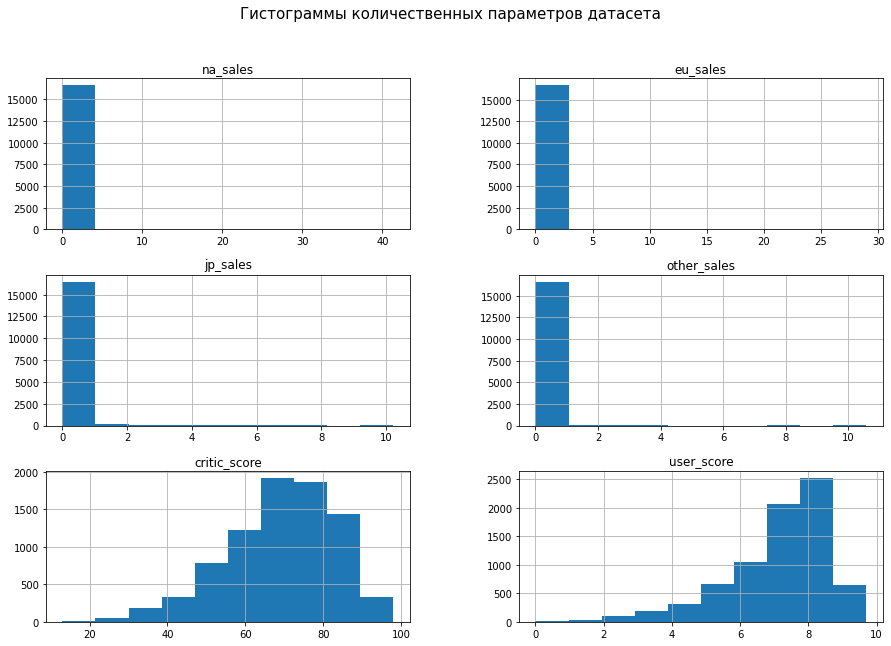

In [32]:
df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].hist(figsize=(15, 10))
plt.suptitle("Гистограммы количественных параметров датасета", fontsize=15);

На гистограммах хорошо видна скошенность наборов данных продаж вправо, а оценок - влево.

Проверим строки с максимальными значениями продаж.

In [33]:
df.loc[(df['na_sales'] == df['na_sales'].max()) | (df['eu_sales'] == df['eu_sales'].max()) | 
       (df['jp_sales'] == df['jp_sales'].max()) | (df['other_sales'] == df['other_sales'].max())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M


Игра `Wii` имеет максимумы продаж в Северно Америке и Европе, `Pokemon` - в Японии, а `GTA` - остальных частях света. В этих данных нет ничего аномального.

**Результат:** в данных столбцов `na_sales`, `eu_sales`, `jp_sales`, `other_sales`, `critic_score`, `user_score` нет аномальных значений.

[К содержанию](#contents)

#### Качественные параметры

- **Столбцы `name`, `platform` и `genre`**

Столбцы `name`, `platform` и `genre` мы рассмотрели на шаге обработки дубликатов. Аномальных значений в них не содержится.

- **Столбец `year_of_release`**

In [34]:
sorted(df['year_of_release'].dropna().unique())

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

В столбце `year_of_release` нет аномальных значений года.

* **Столбец `rating`**

In [35]:
sorted(df['rating'].dropna().unique())

['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T']

В столбце `rating` нет аномальных значений года.

**Результат:** в данных столбцов `name`, `platform`, `genre`, `year_of_release` и `rating` нет аномальных значений.

[К содержанию](#contents)

### 3.6. Добавление новых столбцов <a id='add_new_columns'> </a>

Посчитаем суммарные продажи во всех регионах и запишем их в новый столбец `total_sales`.

In [36]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [37]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


[К содержанию](#contents)

### 3.7. Выводы <a id='data_preprocessing_conclusions'> </a>

В результате предобработки данных были внесены следующие изменения в исходный датасет:  
1) название всех столбцов приведены к нижнему регистру;  
2) изменен тип данных в столбцах:  
 * `year_of_release` с вещественного типа *float64* на целочисленный *int32*;  
 * `user_score` со строкового типа на вещественный *float64*;
 
3) заполнены пропуски в столбцах:    
 * 123 пропуска в столбце `year_of_release`;  
 
4) удалены 4 строки датафрейма:  
 * две строки с отсутствующими значениями в столбцах `genre` и `name`; 
 * две строки с явными дубликатами в названиях игр на одной платформе;  
 
5) добавлен новый столбец `total_sales` со значениями суммарных продаж во всех регионах.  

Необходимо обратить внимание одновременное отсутствие данных в столбцах `user_score`, `critic_score` и `rating` в 6667 строках и выявить причины. 

[К содержанию](#contents)

## 4. Исследовательский анализ данных <a id='research'> </a>

### 4.1. Динамика выпуска игр по годам <a id='games_release_by_years'> </a>

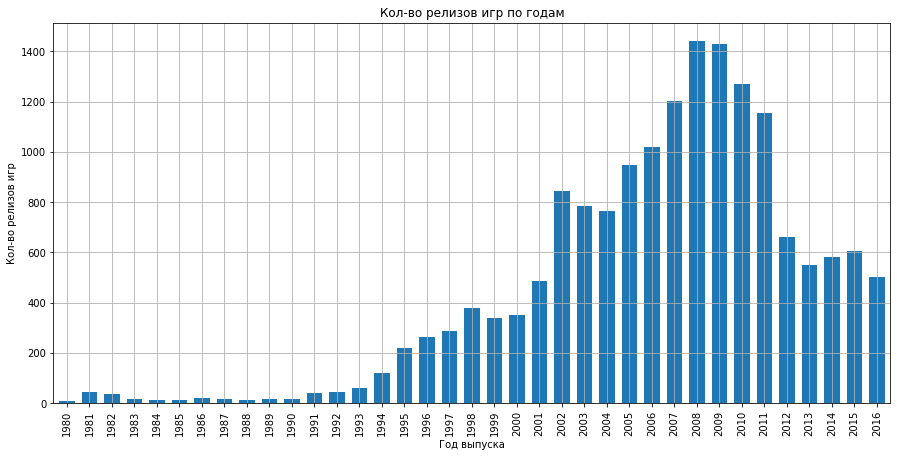

In [38]:
(
df.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', figsize=(15, 7), legend = False, xlabel='Год выпуска', ylabel='Кол-во релизов игр', grid=True, width=0.7)
    .set_title('Кол-во релизов игр по годам', fontsize=12)
);

**Вывод:**  
В период с 1980 по 1994 происходило менее 200 релизов игр в год, поэтому данные за этот период не важны для анализа. 
С 1995 по 2001 год происход постепенный рост количества выпусков игр с 200 до 500 игр в год. В 2002 году присходит скачкообразный рост с 500 до 850 игр в год и достигает максимума 1430-1440 игр в год в 2008-2009 годах. Это золотое время выпуска игр. с 2010 года начинается снижение количества релизов игр в год в релизах игр наступает в 1994 году - и после него начинается бум - компьютерные игры захватывают мир. В 2012 году происходит резкое падение с 1150 до 650 игр в год и по 2016 год держится в диапазоне 500-700 выпущенных игр в год.

[К содержанию](#contents)

### 4.2. Статистика продаж по платформам <a id='games_sales_by_platf'> </a>

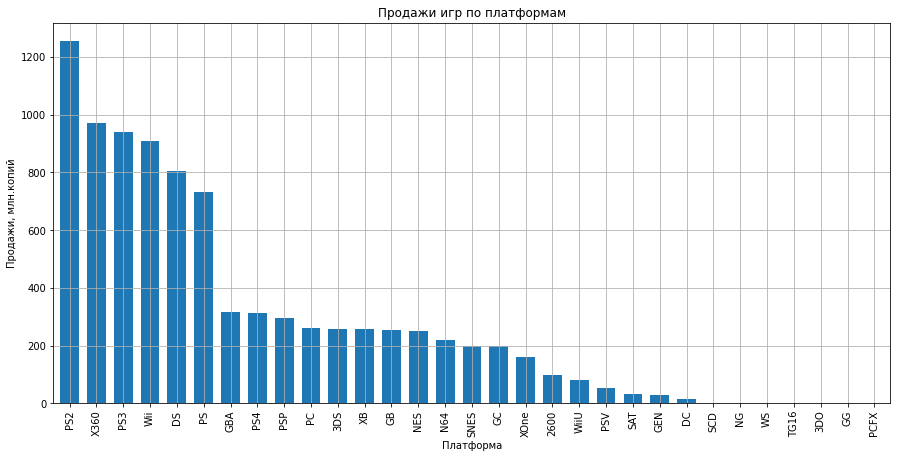

In [39]:
sales_by_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
(
    sales_by_platform
    .plot(kind='bar', figsize=(15, 7), legend = False, xlabel='Платформа', ylabel='Продажи, млн.копий', grid=True, width=0.7)
    .set_title('Продажи игр по платформам', fontsize=12)
);

Выберем первые 6 платформ с наибольшими суммарными продажами и построим распределение по годам. Возьмем данные за актуальный период с 1995 по 2016 годы.

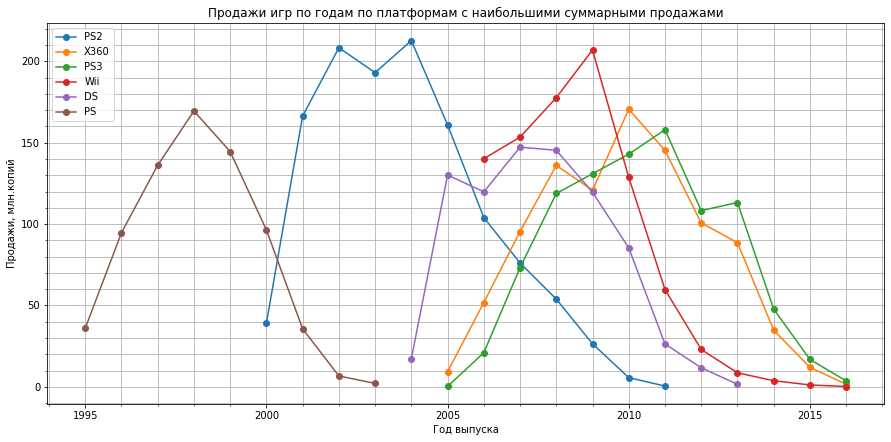

In [40]:
top_sales_platf = sales_by_platform.head(6).index.to_list()
top_platf_sales_by_year = df.pivot_table(index='year_of_release', 
                                         columns='platform', 
                                         values='total_sales', 
                                         aggfunc='sum')[top_sales_platf].loc[1995:]
(
    top_platf_sales_by_year
    .plot(figsize=(15, 7), xlabel='Год выпуска', ylabel='Продажи, млн.копий', style='-o')
    .set_title('Продажи игр по годам по платформам с наибольшими суммарными продажами', fontsize=12)
)
plt.legend(loc=2)
plt.minorticks_on()
plt.grid(visible=True, which='both')

Рассчитаем средний срок жизни платформы для 6 платформ с наибольшими суммарными продажами.

In [41]:
platf_life_time_list = []
for platform in top_sales_platf:
    platf_life_time_list.append(len(top_platf_sales_by_year[platform]) - top_platf_sales_by_year[platform].isna().sum())
print(f'Средний срок жизни платформы {sum(platf_life_time_list)/len(platf_life_time_list)} лет.')

Средний срок жизни платформы 11.0 лет.


**Вывод:**
Платформы PS2, X360, PS3, Wii, DS, PS имеют наибольший объем продаж компьютерных игр. Средний срок жизни платформы составляет 11 лет. Из графика видно, что наибольшие продажи платформы имеют с 3 по 7 год существования.

[К содержанию](#contents)

### 4.3. Выбор потенциально прибыльных платформ в 2017 году <a id='profitable_platf'> </a>

Выясним, какие платформы лидируют по продажам и будут потенциально прибыльны в 2017 году. Средний срок жизни платформы 11 лет, а наибольшие продажи платформы имеют с 3 по 7 год существования. Возьмём в расчёт только данные за актуальный период - последние 3 года с 2014 по 2016 годы, чтобы построить прогноз на 2017 год. Данные за предыдущие годы учитывать не будем.
Построим графики продаж по каждой платформе за период с 2005 по 2016 годы, чтобы можно было оценить срок жизни платформ.

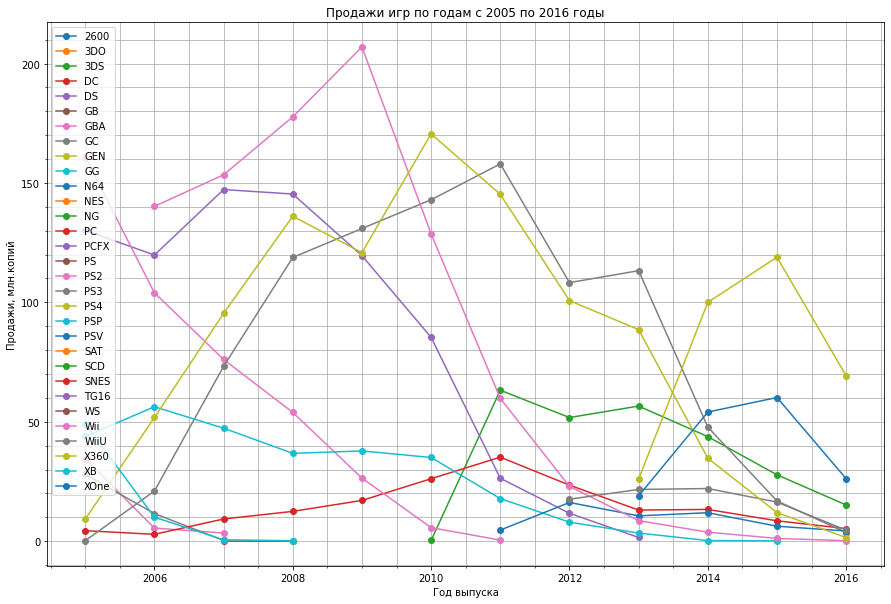

In [42]:
top_platf_sales_by_year = df.pivot_table(index='year_of_release', 
                                         columns='platform', 
                                         values='total_sales', 
                                         aggfunc='sum').loc[2005:]
(
    top_platf_sales_by_year
    .plot(figsize=(15, 10), xlabel='Год выпуска', ylabel='Продажи, млн.копий', style='-o')
    .set_title('Продажи игр по годам с 2005 по 2016 годы', fontsize=12)
)
plt.legend(loc=2)
plt.minorticks_on()
plt.grid(visible=True, which='both')

Из графика видно, что все платформы имеют спад продаж в 2016 году по отношению к 2015 году. В описании данных быдо указано, что данные за 2016 год могут быть неполными. Поэтому, чтобы сделать прогноз на 2017 год будем ориентироваться на данные продаж 2015 года, а данные за 2016 год учитывать не будем. Выведем данные о продажах за 2015 год "живых" платформ и отсортируем их по уменьшению продаж за 2015 год.

In [43]:
(
    df.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
    .loc[:, [2015]]
    .dropna()
    .sort_values(by=2015, ascending=False)
)

year_of_release,2015
platform,
PS4,118.90
XOne,60.14
3DS,27.78
PS3,16.82
WiiU,16.35
X360,11.96
PC,8.52
PSV,6.25
Wii,1.14


Наибольший потенциал роста продаж и прибыли имеют платформы PS4 и XOne. Они существуют всего 4 года и их жизненный цикл еше не достиг середины, поэтому на данный момент это самые перспективные платформы. Только эти две платформы показали рост продаж в 2015 году. Платформы 3DS, PS3, X360, Wii, PSP заканчивают свой жизненный цикл и показывают снижение продаж последние годы, их лучшие годы позади. Платформа WiiU существует 5 лет, а значит имеет потенциал для роста продаж, хоть и показала снижение в 2015 году по отношению к 2014 году. Платформа PC всегда будет востребована и будет приносить умеренную прибыль, что демонстрирует стабильный тренд продаж на протяжении 10 лет. Платформа PSV существует 6 лет и также демонстрирует стабильную умеренную прибыль. Таким образом, список потенциально прибыльных платформ выглядит следующим образом:  
1) PS4  
2) XOne  
3) WiiU  
4) PC  
5) PSV

[К содержанию](#contents)

### 4.4. Диаграммы размаха глобальных продаж игр в разбивке по платформам <a id='global_sales_by_platf'> </a>

Выберем самые популярные платформы за актуальный период с 2014 года и построим диаграммы размаха для первых пяти платформ.

In [44]:
top_5_platf_by_sales = df.loc[df['year_of_release'] > 2013].groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(5)
top_5_platf_by_sales

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22


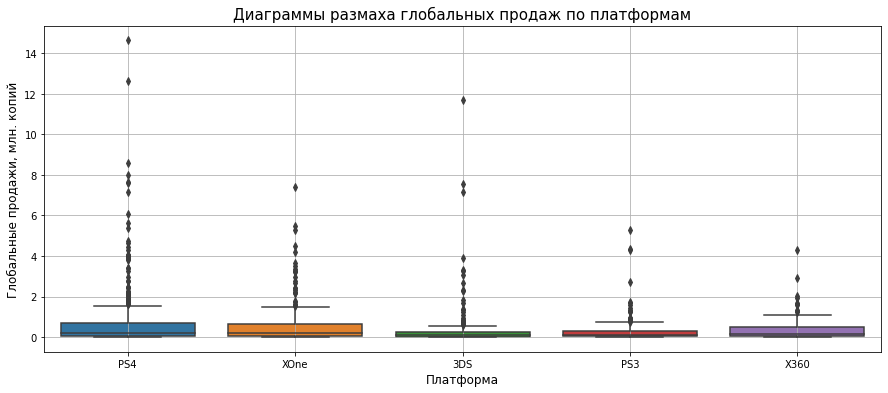

In [45]:
df_top_5_platf = df.loc[(df['platform'].isin(top_5_platf_by_sales['platform'].to_list())) & (df['year_of_release'] > 2013)]
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_top_5_platf, x='platform', y='total_sales', order=top_5_platf_by_sales['platform'].to_list());
plt.grid()
plt.title('Диаграммы размаха глобальных продаж по платформам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи, млн. копий', fontsize=12);

На диаграммах есть значительные выбросы значений продаж, что не позволяет увидеть значения медиан. Например для платформы PS4 есть уникальные значения более 12. Отсечём выбросы, ограничив значение продаж значением 2 млн. копий. После фильтрации значения продаж и позиция платформ в рейтинге поменяются. Выведем обновленную информацию на экран.

In [46]:
df_top_5_platf = df_top_5_platf.loc[df_top_5_platf['total_sales'] <= 2]
top_5_platf_by_sales = df_top_5_platf.pivot_table(index='platform', 
                                                  values='total_sales', 
                                                  aggfunc=['sum', 'count']).sort_values(by=('sum', 'total_sales'), 
                                                                                        ascending=False)
top_5_platf_by_sales

,sum,count
,total_sales,total_sales
platform,,
PS4,111.94,337
XOne,71.10,208
PS3,51.57,215
3DS,39.46,202
X360,38.97,108


,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,202.0,0.20,0.29,0.01,0.03,0.08,0.22,1.83
PS3,215.0,0.24,0.33,0.01,0.04,0.11,0.29,1.74
PS4,337.0,0.33,0.44,0.01,0.05,0.14,0.40,1.92
X360,108.0,0.36,0.43,0.01,0.07,0.18,0.45,1.92
XOne,208.0,0.34,0.42,0.01,0.04,0.15,0.48,1.80


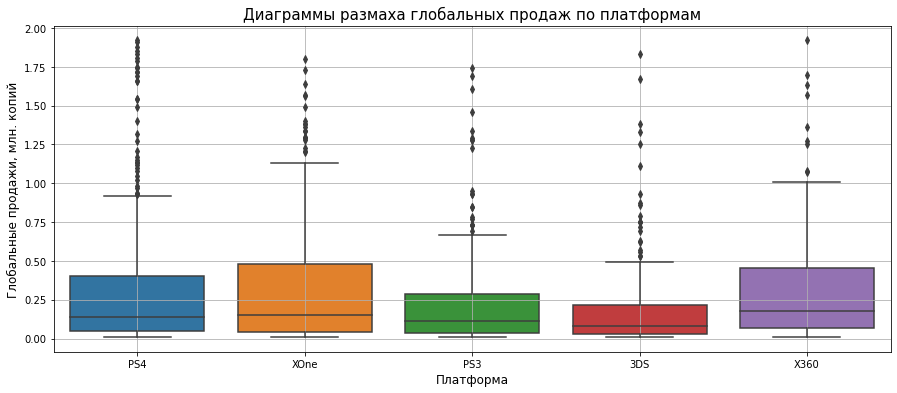

In [47]:
display(df_top_5_platf.groupby(by='platform')['total_sales'].describe().round(2))
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_top_5_platf, x='platform', y='total_sales', order=top_5_platf_by_sales.index.to_list());
plt.grid()
plt.title('Диаграммы размаха глобальных продаж по платформам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи, млн. копий', fontsize=12);

**Вывод:**  
Первая и вторая платформы в рейтинге PS4 и XOne имеют очень близкие медианы 0.14 и 0.15 соответственно, но размах "усов" у них отличается: у PS4 нормальные значения меньше 0.9, а у XOne - меньше 1.1. Медианные значения продаж игры для успешной платформы: от 0.1 до 0.2 млн. копий. Платформа 3DS на третьем месте по продажам, но имеет наименьшие медиану (и размах "усов" среди пяти платформ. Эта платформа имеет наименьший разброс по продажам от игры к игре. То есть платформа приносит стабильный доход с каждой выпускаемой игры. В данном случае, чем больше размах "усов" глобальных продаж по платформе, тем больше разброс значений продаж разных игр. 

[К содержанию](#contents)

### 4.5. Влияние отзывов пользователей и критиков на продажи внутри платформы <a id='scores'> </a>

Возьмем самую популярную платформу за актуальный период с 2014 года PS4 и посмотрим, как влияют на продажи игр отзывы пользователей и критиков. Аномальные значения продаж отсечем значением 2 млн. копий.

Коэффициент корреляции Пирсона для отзывов критиков и продаж: 0.3
Коэффициент корреляции Пирсона для отзывов полльзователей и продаж: -0.022


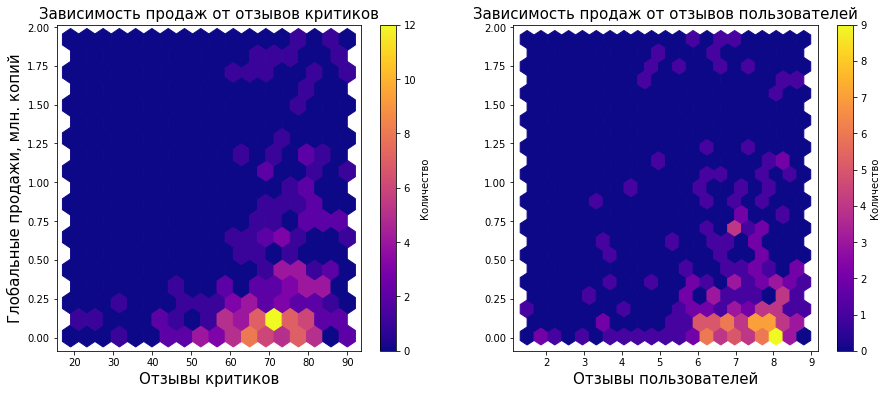

In [48]:
df_PS4 = df_top_5_platf.loc[(df['platform'] == 'PS4')].reset_index(drop=True)
print(f"Коэффициент корреляции Пирсона для отзывов критиков и продаж: {df_PS4['total_sales'].corr(df_PS4['critic_score']):.2}")
print(f"Коэффициент корреляции Пирсона для отзывов полльзователей и продаж: {df_PS4['total_sales'].corr(df_PS4['user_score']):.2}")
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
hb1 = ax1.hexbin(x=df_PS4['critic_score'], y=df_PS4['total_sales'], gridsize=17, cmap='plasma')
cb1 = fig.colorbar(hb1, ax=ax1, label='Количество')
ax1.set_title('Зависимость продаж от отзывов критиков',  fontsize=15)
ax1.set_xlabel('Отзывы критиков', fontsize=15)
ax1.set_ylabel('Глобальные продажи, млн. копий', fontsize=15)
hb2 = ax2.hexbin(x=df_PS4['user_score'], y=df_PS4['total_sales'], gridsize=20, cmap='plasma')
cb2 = fig.colorbar(hb2, ax=ax2, label='Количество')
ax2.set_title('Зависимость продаж от отзывов пользователей',  fontsize=15)
ax2.set_xlabel('Отзывы пользователей', fontsize=15);

**Вывод:**  
Коэффициент кореляции Пирсона для отзывов критиков и продаж 0,3, что говорит об умеренной линейной взаимосвязи двух величин - чем выше оценка критиков, тем выше продажи. Из диаграммы видно, что игры с оценкой до 60 баллов имеют продажи до 0.125. Чтобы иметь медианные продажи успешной платформы, оценка критиков должна быть не ниже 60 баллов. От 70 до 80 баллов продажи могут доходить до миллиона и выше. Взаимосвязь отзывов пользователей и продаж отсутствует. Коэффициент корреляции Пирсона -0.022. Взаимосвязь оценки критиков с продажами теснее, чем оценки пользователей.

Соотнесём выводы с продажами игр на других платформах. Создадим таблицу с двумя столбцами для коэффициентов Пирсона (продажи - оценки критиков, продажи - оценки пользователей) и заполним их значениями для каждой платформы.

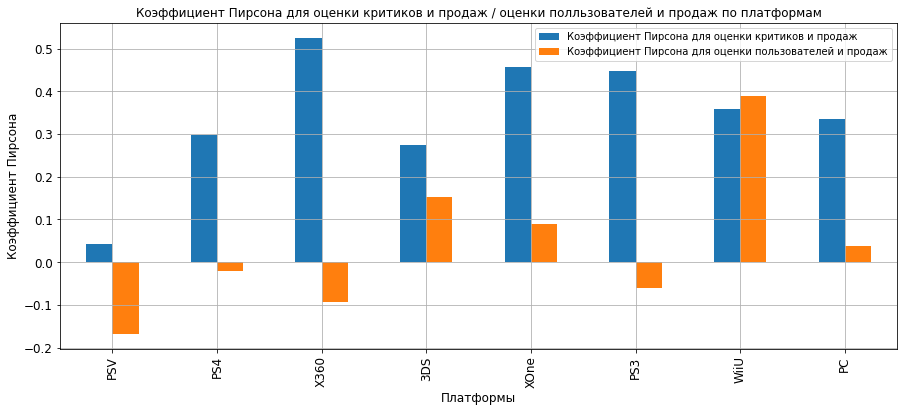

In [49]:
# отфильтруем дата фрейм, чтобы использовать актуальный период и убрать выбросы продаж
df_since_2014_cut_sales = df.loc[(df['year_of_release'] > 2013) & (df['total_sales'] <= 2)]
platforms = df_since_2014_cut_sales['platform'].unique()
# cоздадим таблицу для коэффициентов корреляции Пирсона и заполним её в цикле, перебирая платформы
df_pirson_by_platform = pd.DataFrame(index=platforms, columns=[['pirson_critic_sales', 'pirson_user_sales']])
for platform in platforms:
    df_one_platf = df_since_2014_cut_sales.loc[df_since_2014_cut_sales['platform'] == platform]
    df_pirson_by_platform.loc[platform, 'pirson_critic_sales'] = df_one_platf['critic_score'].corr(df_one_platf['total_sales'])
    df_pirson_by_platform.loc[platform, 'pirson_user_sales'] = df_one_platf['user_score'].corr(df_one_platf['total_sales'])
# построим столбчатую диагрмму для визуализации
df_pirson_by_platform.dropna().plot(figsize=(15, 6), 
                                    kind='bar', grid=True, fontsize=12)
plt.xlabel('Платформы', fontsize=12);
plt.ylabel('Коэффициент Пирсона', fontsize=12)
plt.title('Коэффициент Пирсона для оценки критиков и продаж / оценки полльзователей и продаж по платформам', fontsize=12)
plt.legend(['Коэффициент Пирсона для оценки критиков и продаж', 'Коэффициент Пирсона для оценки пользователей и продаж']);

**Вывод:**  
Наши выводы справедливы для большинства платформ: оценка критиков теснее взаимосвязана с продажами, чем оценка пользователей. Только для платформы WiiU коэффициент корреляции оценка пользователей - продажи больше коэффициента оценка критиков - продажи. Для всех платформ коэффициент корелляции оценка критиков - продажи положителен, но не превышает 0.6. Примечательно, что для трёх платформ PSV, X360, PS3 коэффициент корреляции Пирсона оценка пользователей - продажи отрицательный, то есть между ними обратная взаимосвязь. В целом это говорит об очень слабой взаимосвязи между оценкой пользователей и продажами.

[К содержанию](#contents)

### 4.6. Общее распределение игр по жанрам <a id='genres'> </a>

Посмотрим на общее распределение игр по жанрам за актуальный период с 2014 года. Выясним, выделяются ли жанры с высокими и низкими продажами и что можно сказать о самых прибыльных жанрах.

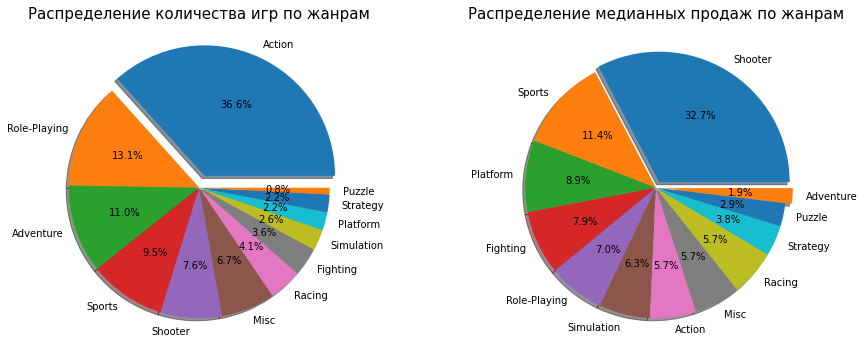

In [50]:
df_pivot_by_genre = df.loc[(df['year_of_release'] > 2013)].pivot_table(index='genre', values=['total_sales'], aggfunc=['count', 'median'])
df_pivot_by_genre.columns = ['count', 'median']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
pie1 = ax1.pie(df_pivot_by_genre['count'].sort_values(ascending=False), 
               labels=df_pivot_by_genre['count'].sort_values(ascending=False).index, 
               autopct='%1.1f%%', explode=(0.1,0,0,0,0,0,0,0,0,0,0,0), shadow=True)
ax1.set_title('Распределение количества игр по жанрам',  fontsize=15)
pie2 = ax2.pie(x=df_pivot_by_genre['median'].sort_values(ascending=False), 
               labels=df_pivot_by_genre['median'].sort_values(ascending=False).index, 
               autopct='%1.1f%%', explode=(0.05,0,0,0,0,0,0,0,0,0,0,0.05), shadow=True)
ax2.set_title('Распределение медианных продаж по жанрам',  fontsize=15);

**Вывод:**   
Больше всего игр выходит в жанре Action (23%). Cамый популярный и прибыльный жанр - Shooter, продажи составляют 33% от продаж всех игр. В тройку лидеров по продажам входят также жанры Sports (11,4%) и Platform (9%). Жанры с самыми низкими продажами Strategy (3,8%),  Puzzle (3%) и Adventure (2%).

[К содержанию](#contents)

## 5. Портрет пользователя каждого региона <a id='portrait_of_user'> </a>

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Посмотрим различия в долях продаж.  
- Самые популярные жанры (топ-5). Посмотрим разницу.  
- Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе.

### 5.1. Топ-5 популярных платформ в регионах <a id='top_5_by_platf'> </a>

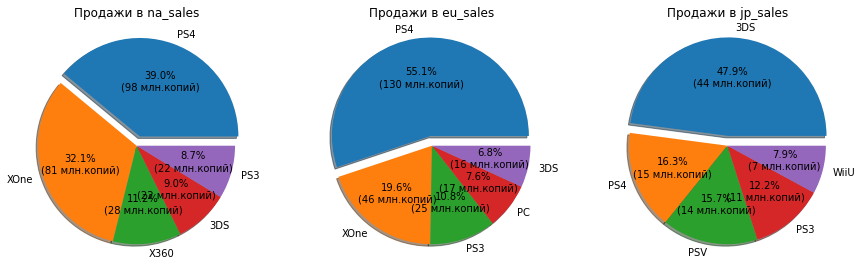

In [51]:
# будем использовать данные за актуальный период с 2014 года
df_since_2014 = df.loc[(df['year_of_release'] > 2013)]
region = ['na_sales', 'eu_sales', 'jp_sales']

# напишем функцию, которая будет строить пай-чарты продаж по регионам
# функция принимает параметры : датафрейм, параметр, по которому нужны продажи и какой топ нужен
def draw_top5_pies_by_regions(df, group, top):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
    explode = [0] * top
    explode[0] = 0.1
    for i in range(3):
        df_grouped = df.groupby(group)[region[i]].sum().sort_values(ascending=False).head(top)
        axes[i].pie(df_grouped, labels=df_grouped.index, autopct=lambda pct: func(pct, df_grouped), explode=explode, shadow=True)
        axes[i].set_title(f'Продажи в {region[i]}')

# функция func возвращает значения продаж в процентах и абсолютное значение продаж в виде строки, чтобы отобразить на пироге
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} млн.копий)".format(pct, absolute)

draw_top5_pies_by_regions(df_since_2014, 'platform', 5)

**Вывод:**
В Северной Америке и Европе самая популярная платформа - PS4, а в Японии - 3DS. Можно отметить, что в Японии платформа XOne не входит в топ-5 самых популярных, но там пользуются популярностью WiiU и PSV, которые не входят в топ-5 в других регионах. Аналогичная ситуация с X360 в Северной Америке и PC в Европе.

[К содержанию](#contents)

### 5.2. Топ-5 популярных жанров в регионах <a id='top_5_by_genres'> </a>

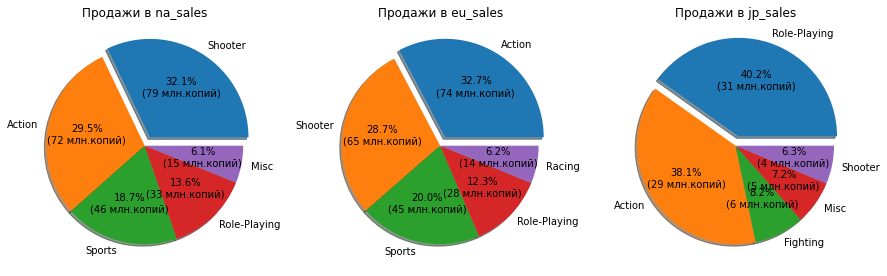

In [52]:
draw_top5_pies_by_regions(df_since_2014, 'genre', 5)

**Вывод:**  
В Северной Америке и Европе самые популярные жанры Shooter, Action, Sports. Культуры Северной Америки и Европы близки, поэтому предпочтения в жанрах совпадают. В Японии же самый популярный жанр Role-Playing - японская ролевая игра. Большинство таких игр было разработано в Японии и в первую очередь для внутреннего японского рынка. Этот жанр не получил такую популярность в Северной Америке или Европы. Всё-таки культуры западных стран и страны восходящего солнца сильно различаются. Следом по популярности в Японии идут жанры Action, Fighting, Misc и Shooter.

[К содержанию](#contents)

### 5.3. Влияние рейтинга ESRB на продажи в отдельных регионах <a id='rating_influence'> </a>

In [53]:
display(df.groupby('rating')[region].sum().sort_values(by='na_sales', ascending=False))

,na_sales,eu_sales,jp_sales
rating,,,
E,1292.99,710.24,198.11
T,759.75,427.03,151.40
M,748.48,483.97,64.24
E10+,353.32,188.04,40.20
K-A,2.56,0.27,1.46
EC,1.53,0.11,0.00
AO,1.26,0.61,0.00
RP,0.00,0.08,0.00


Из таблицы видно, что в играх используется 4 основных рейтинга: «E»,«T»,«M» и «E10+». Остальные рейтигни практически не использутся, поэтому учитывать их на диграммах нет смысла.

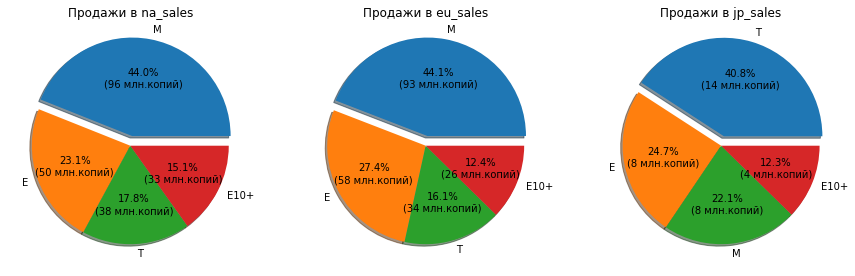

In [54]:
draw_top5_pies_by_regions(df_since_2014, 'rating', 4)

Справка по рейтингам:  
- «E» («K-A» до 1998 года) («Everyone») — «Для всех»  
- «T» («Teen») — «Подросткам»  
- «M» («Mature») — «Для взрослых»  
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  
- «EC» («Early childhood») — «Для детей младшего возраста»  
- «AO» («Adults Only 18+») — «Только для взрослых»  
- «RP» («Rating Pending») — «Рейтинг ожидается»  

Источник: https://www.esrb.org/

**Вывод:**  
Все регионы имеют схожую картину влияния рейтингов на продажи. Игры с рейтингом «M» наиболее популярны в Северной Америке и Европе. Игры с рейтингом «T» наиболее популярны в Японии. На японском рынке более популярны игры, ориентированые на подростков, чем на взрослых.

[К содержанию](#contents)

### 5.4. Вывод <a id='portrait_conclusion'> </a>

Портрет пользователя каждого региона выглядит следующим образом:

|Пользователь                     | Любимая платформа| Любимый жанр   | Рейтинг игры  
|:----:                           | :----:           | :----:         | :----:
|Пользователь из Северной Америки | PS4              | Shooter        | M, E 
|Пользователь из Европы           | PS4              | Action         | M, E 
|Пользователь из Японии           | 3DS              | Role-Playing   | T, E 

[К содержанию](#contents)

## 6. Проверка гипотез <a id='hypothesis_checking'> </a>

### 6.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <a id='user_scores_avg'> </a>

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC равны по взятым выборкам пользовательских рейтингов по этим двум платформам за актуальный период с 2014 года. Сформулируем нулевую (H₀) и альтернативную гипотезы (H₁):  
- H₀: Средние пользовательские рейтинги платформ Xbox One и PC равны;
- H₁: Средние пользовательские рейтинги платформ Xbox One и PC не равны.  

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам используем статистический тест с использованием t-распределения (метод `scipy.stats.ttest_ind()`)

Получим выборки пользовательских рейтингов по консолям Xbox One и PC.

In [55]:
x_box_one = df_since_2014[df_since_2014['platform'] == 'XOne']['user_score'].dropna()
pc = df_since_2014[df_since_2014['platform'] == 'PC']['user_score'].dropna()

Оснований полагать, что дисперсии выборок равны, у нас нет. Проверим.

In [56]:
if (np.var(x_box_one) == np.var(pc)):
    print('Дисперсии выборок равны.')
else:
    print('Дисперсии выборок не равны.')

Дисперсии выборок не равны.


Таким образом параметр `equal_var` следует установить `False`.
Уровень значимости `alpha` зададим 0.05.

In [57]:
alpha = .05
result = st.ttest_ind(x_box_one, pc, equal_var=False)
print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


**Вывод:**  
Вероятность, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые при условии, что нулевая гипотеза верна, выше уровня значимости. Мы не можем сделать вывод о значимом различии между средними двух генеральных совокупностей, поэтому не получается отвергнуть нулевую гипотезу. Принимаем нулевую гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC равны.

[К содержанию](#contents)

### 6.2. Средние пользовательские рейтинги жанров Action и Sports разные <a id='user_scores_avg_2'> </a>

Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные по выборкам за актуальный период с 2014 года. Сформулируем нулевую (H₀) и альтернативную гипотезы (H₁):  
- H₀: Средние пользовательские рейтинги жанров Action и Sports равны;
- H₁: Средние пользовательские рейтинги жанров Action и Sports не равны.  

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам используем статистический тест с использованием t-распределения (метод `scipy.stats.ttest_ind()`)

Получим выборки пользовательских рейтингов по жанрам Action и Sports.

In [58]:
action = df_since_2014[df_since_2014['genre'] == 'Action']['user_score'].dropna()
sports = df_since_2014[df_since_2014['genre'] == 'Sports']['user_score'].dropna()

Оснований полагать, что дисперсии выборок равны, у нас нет. Проверим.

In [59]:
if (np.var(action) == np.var(sports)):
    print('Дисперсии выборок равны.')
else:
    print('Дисперсии выборок не равны.')

Дисперсии выборок не равны.


Таким образом параметр `equal_var` следует установить `False`.
Уровень значимости `alpha` зададим 0.05.

In [60]:
alpha = .05
result = st.ttest_ind(action, sports, equal_var=False)
print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нудевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод:**  
Вероятность, что средние пользовательские рейтинги жанров Action и Sports равны при условии, что нулевая гипотеза верна, меньше уровня значимости. Делаем вывод о значимом различии между средними двух генеральных совокупностей, отвергаем нулевую гипотезу и принимаем альтернативную гипотезу, что средние пользовательские рейтинги жанров Action и Sports не равны.

[К содержанию](#contents)

## 7. Итоги исследования <a id='research_results'> </a>

В данной работе были исследованы исторические данные о продажах компьютерных игр, оценках пользователей и экспертов, жанрах и платформах.
Была выполнена предобработка данных - обработали пропуски и аномальные значения, изменили типы данных в некоторых столбцах и добавили новый столбец с глобальными продажами для проведения анализа данных. Было обнаружено большое количество строк (40% от общего кол-ва) с полным отсутствием данных в столбцах `user_score`, `critic_score` и `rating`. Необходимо провести работу по выявляению и устранению причин появления пропусков. Также прмерно в 15% строках от общего количества присутствуют пропуски в столбце `user_score`, так как мы заменили в них значение `tbd` на пропуски.
Далее данные были изучены и выявлены интересные закономерности, определяющие успешность игры:
1) потенциально прибыльные платформы, которые лидируют по продажам и растут:  
 1. PS4    
 2. XOne   
 3. WiiU  
 4. PC  
 5. PSV  

2) Медианные значения продаж игры для успешной платформы: от 0.1 до 0.2 млн. копий.  
3) Отзывы критиков теснее взаимосвязаны с продажами, чем отзывы пользователей, присутствует умеренная линейная зависимость - чем выше оценка критиков, тем выше продажи.  
4) Чтобы иметь медианные продажи успешной платформы, оценка критиков должна быть не ниже 60 баллов;  
5) Самый прибыльный жанр игры - Shooter (33% от продаж всех игр), за ним идут жанры Sports (11,4%) и Platform (9%);  
6) Портрет пользователя каждого региона выглядит следующим образом:

|Пользователь                     | Любимая платформа| Любимый жанр   | Рейтинг игры  
|:----:                           | :----:           | :----:         | :----:
|Пользователь из Северной Америки | PS4              | Shooter        | M, E 
|Пользователь из Европы           | PS4              | Action         | M, E 
|Пользователь из Японии           | 3DS              | Role-Playing   | T, E  

7) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
8) Средние пользовательские рейтинги жанров Action и Sports разные.

**Рекомендации:**  
Потенциально популярный продукт, на который нужно делать ставку и планировать рекламные кампании, должен быть на платформе PS4 жанра Shooter рейтинга M с оценкой критиков не ниже 60 баллов. Для рынка Японии платформа 3DS, жанр продукта Role-Playing и рейтинг T будут предпочтительней.

[К содержанию](#contents)